In [6]:
import torch 
x=torch.empty(3,2)
print(x)
x.shape

tensor([[-2.7725e-21,  4.5895e-41],
        [-7.7053e-35,  3.0644e-41],
        [ 0.0000e+00,  0.0000e+00]])


torch.Size([3, 2])

In [9]:
x_rand=torch.rand(2,3)
print(x_rand)
print(x_rand.dtype)

tensor([[0.5163, 0.6662, 0.3572],
        [0.9209, 0.9972, 0.0017]])
torch.float32


In [11]:
x_dt=torch.ones(2,2,dtype=torch.float16)
print(x_dt.dtype)

torch.float16


In [12]:
x=torch.rand(2,2)
y=torch.rand(2,2)
print(x+y)

tensor([[0.7399, 1.7881],
        [0.7786, 1.3155]])


In [14]:
y.add_(x)## _ means in place operation

tensor([[1.3756, 2.6697],
        [1.4816, 1.8891]])

In [16]:
torch.subtract(x,y)
torch.mul(x,y)
torch.div(x,y)

tensor([[0.4621, 0.3302],
        [0.4745, 0.3036]])

In [17]:
x_slice=torch.rand(5,3)
print(x_slice)

tensor([[0.6952, 0.6693, 0.4393],
        [0.3997, 0.0474, 0.9590],
        [0.0713, 0.1092, 0.1300],
        [0.0143, 0.2588, 0.5623],
        [0.4019, 0.8602, 0.2614]])


In [18]:
x_slice[:,1] ## slicing like numpy array 

tensor([0.6693, 0.0474, 0.1092, 0.2588, 0.8602])

In [20]:
x_slice.reshape(3,5)

tensor([[0.6952, 0.6693, 0.4393, 0.3997, 0.0474],
        [0.9590, 0.0713, 0.1092, 0.1300, 0.0143],
        [0.2588, 0.5623, 0.4019, 0.8602, 0.2614]])

In [21]:
x_slice.reshape(15,)

tensor([0.6952, 0.6693, 0.4393, 0.3997, 0.0474, 0.9590, 0.0713, 0.1092, 0.1300,
        0.0143, 0.2588, 0.5623, 0.4019, 0.8602, 0.2614])

In [22]:
x_slice.view(3,-1)

tensor([[0.6952, 0.6693, 0.4393, 0.3997, 0.0474],
        [0.9590, 0.0713, 0.1092, 0.1300, 0.0143],
        [0.2588, 0.5623, 0.4019, 0.8602, 0.2614]])

In [23]:
import numpy as np

In [26]:
numpy_array=np.ones([3,2])

In [30]:
numpytotorch=torch.tensor(numpy_array,dtype=torch.int32)

In [31]:
np.asarray(numpytotorch)

array([[1, 1],
       [1, 1],
       [1, 1]], dtype=int32)

In [32]:
numpytotorch.numpy()

array([[1, 1],
       [1, 1],
       [1, 1]], dtype=int32)

In [34]:
torch.from_numpy(numpy_array)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]], dtype=torch.float64)

In [35]:
## bynoy can only handle cpu not the gpu if you want to convert a 
## tensor(gpu) to numpy then you have to convert/move it to cpu first

tensor1=torch.empty(3,6)

In [43]:
# how to push tensor1 to gpu
if torch.cuda.is_available():
    device=torch.device("cuda")
    print(device)
    tensorG=tensor1.to(device)
    print(tensorG.device)

cuda
cuda:0


In [40]:
if torch.cuda.is_available():
    device=torch.device('cuda')
    x=torch.ones(2,3,device=device)
    x.to('cpu')

In [41]:
# to tell pytorch that the declared tensor need to calculate the gradient 
## during the optimization phase i have to mention that requires_grad=True
x=torch.ones(3,2,requires_grad=True)

In [46]:
torch.tensor([3,3],dtype=torch.float16,device=torch.device('cuda'),requires_grad=True)

tensor([3., 3.], device='cuda:0', dtype=torch.float16, requires_grad=True)

In [47]:
# backpropagation 
# first we need to know chain rule
# dz/dx= dz/dy*dy/dx
# next conceps computational graph
#  linear regression
#  loss=()

 ## 
import torch
x=torch.tensor(1.0)
y=torch.tensor(2.0)
w=torch.tensor(1.0,requires_grad=True)
y_hat=x*w
loss=(y_hat-y)**2## forward pass 
loss.backward()## do the local gradient and backward pass 
print(w.grad)## update the weight according to the gradient 

tensor(-2.)


In [34]:
## implementation of neural network in numpy 
import numpy as np
# f=w*x
# x=np.array([1,2,3,4],dtype=np.float16)
# y=np.array([2,4,6,8],dtype=np.float16)
x=np.array([2,2,2,2],dtype=np.float16)
y=np.array([3,3,3,3],dtype=np.float16)
w=0

# MSE=1/N(w*x-y)**2
# dMSE/dw=1/N(w*x)

def forward(x):
    return w*x

def loss(y,y_predicted):
    return ((y-y_predicted)**2).mean()

def gradient(x,y,y_pred):
    
    return np.dot(2*x,(y_pred-y)).mean()

learning_rate=.01
n_iter=30

for epoch in range(n_iter):
    y_prediction = forward(x)
    l= loss(y,y_prediction)
    dw = gradient(x,y,y_prediction)
    w -= learning_rate*dw
    if epoch%2==0:
        print(f'epoch{epoch+1}:w={w:.3f},loss={l:.8f}')

print(f'prediction after training:f(5)={forward(5):.3f}')



epoch1:w=0.480,loss=9.00000000
epoch3:w=1.028,loss=1.92578125
epoch5:w=1.282,loss=0.41040039
epoch7:w=1.399,loss=0.08813477
epoch9:w=1.453,loss=0.01869202
epoch11:w=1.478,loss=0.00390625
epoch13:w=1.490,loss=0.00085831
epoch15:w=1.495,loss=0.00018692
epoch17:w=1.498,loss=0.00003433
epoch19:w=1.499,loss=0.00001526
epoch21:w=1.500,loss=0.00000381
epoch23:w=1.500,loss=0.00000000
epoch25:w=1.500,loss=0.00000000
epoch27:w=1.500,loss=0.00000000
epoch29:w=1.500,loss=0.00000000
prediction after training:f(5)=7.498


In [50]:
import numpy as np

x=np.array([2,2,3,1],dtype=np.float16)
y=np.array([4,3,2,12],dtype=np.float16)
w=0

n_iter=20
learning_rate=.01

def forward(x):
    # print('----------')
    print(w)
    return x*w
def loss(y,y_pd):
    return ((y_pd-y)**2).mean()
def gradient(x,y,y_pd):
    return np.dot(2*x,(y_pd-y)).mean()

print(f"prediction before training f(5):{forward(5):.3f}")

for epoch in range(n_iter):
    y_pred=forward(x)

    ls=loss(y,y_pred)

    dw=gradient(x,y,y_pred)

    w=w-learning_rate*dw
  
    print(f'epoch{epoch+1}:w={w:.3f},loss={ls:.8f}')

print(f"prediction after training f(5):{forward(5):.3f}")
    



0
prediction before training f(5):0.000
0
epoch1:w=0.640,loss=43.25000000
0.64
epoch2:w=1.049,loss=34.84375000
1.049375
epoch3:w=1.312,loss=31.43750000
1.3115625
epoch4:w=1.479,loss=30.00000000
1.4793749999999999
epoch5:w=1.587,loss=29.43750000
1.5868749999999998
epoch6:w=1.656,loss=29.18750000
1.6555468749999998
epoch7:w=1.700,loss=29.09375000
1.6996874999999998
epoch8:w=1.728,loss=29.03125000
1.727890625
epoch9:w=1.746,loss=29.04687500
1.7459375
epoch10:w=1.757,loss=29.01562500
1.7572656249999998
epoch11:w=1.765,loss=29.01562500
1.7648437499999998
epoch12:w=1.770,loss=29.03125000
1.769609375
epoch13:w=1.773,loss=29.04687500
1.7726562499999998
epoch14:w=1.775,loss=29.01562500
1.7746093749999998
epoch15:w=1.776,loss=29.03125000
1.7757812499999999
epoch16:w=1.777,loss=29.03125000
1.7765624999999998
epoch17:w=1.777,loss=29.03125000
1.7771875
epoch18:w=1.777,loss=29.01562500
1.7772656249999998
epoch19:w=1.777,loss=29.01562500
1.7773437499999998
epoch20:w=1.777,loss=29.01562500
1.777421874

In [80]:
import torch 

x= torch.tensor([2,2,3,1],dtype=torch.float32)
y=torch.tensor([4,3,2,12],dtype=torch.float32)
w=torch.tensor(0,dtype=torch.float32,requires_grad=True)

def forward(x):
   return(x*w)
def loss(y,ypd):
   return((ypd-y)**2).mean()

print(f"prediction of the modle before training f(6): {forward(5).item():.3f}")

learning_rate=0.01
n_iter=10

for epoch in range(n_iter):
   y_prediction=forward(x)
   l=loss(y,y_prediction)
   ################################ we have to do backpropagartion on loss function ################################################
   l.backward()
   with torch.no_grad():
      w-=learning_rate*w.grad ### negative of w 
   print('----b------')
   print(w)
   w.grad.zero_()
   print('-----a-----')
   print(w)
   if epoch % 20:
      print(f'epoch{epoch+1}:w={w:.3f},loss={l:.5f}')

print(f"prediction of the modle after training f(6): {forward(5).item():.3f}") 

prediction of the modle before training f(6): 0.000
----b------
tensor(0.1600, requires_grad=True)
-----a-----
tensor(0.1600, requires_grad=True)
----b------
tensor(0.3056, requires_grad=True)
-----a-----
tensor(0.3056, requires_grad=True)
epoch2:w=0.306,loss=40.80520
----b------
tensor(0.4381, requires_grad=True)
-----a-----
tensor(0.4381, requires_grad=True)
epoch3:w=0.438,loss=38.78066
----b------
tensor(0.5587, requires_grad=True)
-----a-----
tensor(0.5587, requires_grad=True)
epoch4:w=0.559,loss=37.10414
----b------
tensor(0.6684, requires_grad=True)
-----a-----
tensor(0.6684, requires_grad=True)
epoch5:w=0.668,loss=35.71582
----b------
tensor(0.7682, requires_grad=True)
-----a-----
tensor(0.7682, requires_grad=True)
epoch6:w=0.768,loss=34.56614
----b------
tensor(0.8591, requires_grad=True)
-----a-----
tensor(0.8591, requires_grad=True)
epoch7:w=0.859,loss=33.61410
----b------
tensor(0.9418, requires_grad=True)
-----a-----
tensor(0.9418, requires_grad=True)
epoch8:w=0.942,loss=32

In [102]:
x=torch.tensor([[1],[2],[3],[4]],dtype=torch.float32)
y=torch.tensor([[2],[4],[6],[8]],dtype=torch.float32)

number_sample,number_feature=x.shape
print(f'Number of feature:{number_feature},Number of sample:{number_sample}')
input_size=number_feature
output_size=number_feature

Number of feature:1,Number of sample:4


In [108]:
### Design model(input size, output size, forward pass)
### construct loss and opmtimizer 
### training loop
#### -forward pass:make prediction
#### -backward pass:compute gradient
#### -update weight

import torch
import torch.nn as nn

x=torch.tensor([[1],[2],[3],[4]],dtype=torch.float32)
y=torch.tensor([[2],[4],[6],[8]],dtype=torch.float32)

number_sample,number_feature=x.shape
print(f'Number of feature:{number_feature},Number of sample:{number_sample}')
input_size=number_feature
output_size=number_feature

model=nn.Linear(input_size,output_size)
# w=torch.tensor(0.0,dtype=torch.float32,requires_grad=True)

# def forward(x):
#    return(x*w)
loss=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

# def loss(y,ypd):
#    return((ypd-y)**2).mean()

print(f"prediction of the modle before training f(6): {forward(5).item():.3f}")

learning_rate=0.01
n_iter=100

for epoch in range(n_iter):
   y_prediction=model(x)

   l= loss(y,y_prediction)
   # l=loss(y,y_prediction)
   l.backward()
   optimizer.step()
   # with torch.no_grad():
   #    w-=learning_rate*w.grad ### negative of w 
   optimizer.zero_grad()
   # w.grad.zero_()

   if epoch % 20:
      w,b=model.parameters()
      print(f'epoch{epoch+1}:w={w[0][0]:.3f},loss={l:.5f}')

print(f"prediction of the modle after training f(6): {forward(5).item():.3f}") 

Number of feature:1,Number of sample:4
prediction of the modle before training f(6): 12.093
epoch2:w=0.117,loss=39.85429
epoch3:w=0.405,loss=27.66539
epoch4:w=0.645,loss=19.20770
epoch5:w=0.845,loss=13.33902
epoch6:w=1.012,loss=9.26680
epoch7:w=1.150,loss=6.44111
epoch8:w=1.266,loss=4.48035
epoch9:w=1.363,loss=3.11976
epoch10:w=1.443,loss=2.17561
epoch11:w=1.510,loss=1.52041
epoch12:w=1.566,loss=1.06573
epoch13:w=1.613,loss=0.75016
epoch14:w=1.652,loss=0.53114
epoch15:w=1.685,loss=0.37910
epoch16:w=1.712,loss=0.27353
epoch17:w=1.735,loss=0.20023
epoch18:w=1.754,loss=0.14930
epoch19:w=1.770,loss=0.11389
epoch20:w=1.783,loss=0.08927
epoch22:w=1.804,loss=0.06016
epoch23:w=1.811,loss=0.05180
epoch24:w=1.818,loss=0.04594
epoch25:w=1.824,loss=0.04181
epoch26:w=1.828,loss=0.03889
epoch27:w=1.833,loss=0.03680
epoch28:w=1.836,loss=0.03530
epoch29:w=1.839,loss=0.03419
epoch30:w=1.841,loss=0.03337
epoch31:w=1.844,loss=0.03274
epoch32:w=1.845,loss=0.03225
epoch33:w=1.847,loss=0.03185
epoch34:w=1.8

In [129]:
### Design model(input size, output size, forward pass)
### construct loss and opmtimizer 
### training loop
#### -forward pass:make prediction
#### -backward pass:compute gradient
#### -update weight

import torch
import torch.nn as nn

x=torch.tensor([[1],[2],[3],[4]],dtype=torch.float32)
y=torch.tensor([[2],[4],[6],[8]],dtype=torch.float32)

number_sample,number_feature=x.shape
print(f'Number of feature:{number_feature},Number of sample:{number_sample}')
input_size=number_feature
output_size=number_feature

model=nn.Linear(input_size,output_size)

class Linear_regression(nn.Module):
   def __init__(self,input_dim,output_dim):
      super(Linear_regression,self).__init__()
      self.ln=nn.Linear(input_dim,output_dim)
   def forward(self,x):
      return self.ln(x)

model=Linear_regression(input_size,output_size)
# w=torch.tensor(0.0,dtype=torch.float32,requires_grad=True)

# def forward(x):
#    return(x*w)
loss=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

# def loss(y,ypd):
#    return((ypd-y)**2).mean()

print(f"prediction of the modle before training f(6): {forward(5).item():.3f}")

learning_rate=0.01
n_iter=100

for epoch in range(n_iter):
   y_prediction=model(x)

   l= loss(y,y_prediction)
   # l=loss(y,y_prediction)
   l.backward()
   optimizer.step()
   # with torch.no_grad():
   #    w-=learning_rate*w.grad ### negative of w 
   optimizer.zero_grad()
   # w.grad.zero_()

   if epoch % 20:
      w,b=model.parameters()
      print(f'epoch{epoch+1}:w={w[0][0]:.3f},loss={l:.5f}')

print(f"prediction of the model after training f(5): {forward(5).item():.3f}") 

Number of feature:1,Number of sample:4
prediction of the modle before training f(6): 8.542
epoch2:w=0.863,loss=8.87734
epoch3:w=0.998,loss=6.20770
epoch4:w=1.111,loss=4.35500
epoch5:w=1.206,loss=3.06917
epoch6:w=1.285,loss=2.17667
epoch7:w=1.350,loss=1.55711
epoch8:w=1.405,loss=1.12693
epoch9:w=1.451,loss=0.82816
epoch10:w=1.490,loss=0.62057
epoch11:w=1.522,loss=0.47625
epoch12:w=1.549,loss=0.37584
epoch13:w=1.571,loss=0.30590
epoch14:w=1.590,loss=0.25710
epoch15:w=1.606,loss=0.22297
epoch16:w=1.620,loss=0.19902
epoch17:w=1.631,loss=0.18213
epoch18:w=1.641,loss=0.17016
epoch19:w=1.649,loss=0.16158
epoch20:w=1.656,loss=0.15537
epoch22:w=1.667,loss=0.14738
epoch23:w=1.671,loss=0.14475
epoch24:w=1.675,loss=0.14267
epoch25:w=1.679,loss=0.14097
epoch26:w=1.682,loss=0.13954
epoch27:w=1.684,loss=0.13830
epoch28:w=1.686,loss=0.13719
epoch29:w=1.689,loss=0.13618
epoch30:w=1.690,loss=0.13523
epoch31:w=1.692,loss=0.13433
epoch32:w=1.694,loss=0.13346
epoch33:w=1.695,loss=0.13261
epoch34:w=1.697,lo

epoch: 1, weight: 0.9567664861679077, loss: 5682.6943359375
epoch: 101, weight: 63.998443603515625, loss: 407.8380432128906
epoch: 201, weight: 73.30953979492188, loss: 292.774169921875
epoch: 301, weight: 74.69132232666016, loss: 290.2186279296875
epoch: 401, weight: 74.89725494384766, loss: 290.1610412597656


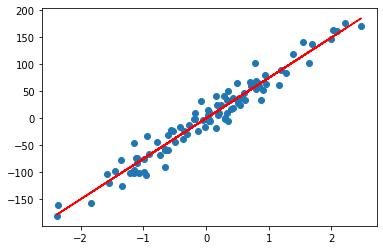

In [189]:
## try to incorporate all our learn concepts
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
## prepare dataset
x_numpy,y_numpy=datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=4)
import matplotlib.pyplot as pl

X=torch.from_numpy(x_numpy.astype(np.float32))
y=torch.from_numpy(y_numpy.astype(np.float32))

y = y.view(y.shape[0], 1)


## Define model 
class regression(nn.Module):
   def __init__(self,input_size,output_size):
      super(regression,self).__init__()
      self.ln=nn.Linear(input_size,output_size)

   def forward(self,x):
      return self.ln(x)
sample,feature=X.shape
# print(feature)
input_size=feature
output_size=feature
model=regression(input_size,output_size)
# print(model)
## Train

## Model parameters
learning_rate=0.01
n_iter=500
ls=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

# X_pred_b=model(X).detach().numpy()

## train
for epoch in range(n_iter):
   y_pred=model(X)
   # print(y.type)
   loss=ls(y,y_pred)
   # print(type(loss))
   loss.backward()
   optimizer.step()
   optimizer.zero_grad()
   if epoch%100==0:
      w,b=model.parameters()
      print(f"epoch: {epoch+1}, weight: {w[0][0]}, loss: {loss}")
y_pd=model(X).detach().numpy()

pl.plot(x_numpy,y_pd,'r')
pl.scatter(X_numpy,y_numpy)





In [69]:
import torch
import torch.nn as nn
import numpy as np
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# 0) Prepare data
X_numpy, y_numpy = datasets.make_classification(n_samples=5000,n_classes=2, random_state=4)
import matplotlib.pyplot as pl
# pl.scatter(X_numpy,y_numpy)
# cast to float Tensor
x_train,  x_test, y_train,y_test =train_test_split(X_numpy, y_numpy)

x_train = torch.from_numpy(x_train.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
x_test = torch.from_numpy(x_test.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))
y_train = y_train.view(y_train.shape[0], 1)
y_test= y_test.view(y_test.shape[0], 1)

n_samples, n_features = x_train.shape

# 1) Model
# Linear model f = wx + b
input_size = n_features
output_class = 1

class Model(nn.Module):
    def __init__(self, input_size,output_class):
        super(Model, self).__init__()
        self.ln=nn.Linear(input_size,output_class)
    def forward(self,x):
        p=torch.sigmoid(self.ln(x))
        return(p)
        
model = Model(input_size, output_class)
# 2) Loss and optimizer
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# 3) Training loop
num_epochs = 100
def accuracy_P(y,yp):
    with torch.no_grad():
        y_predP=yp.round()
        
        acc=y_predP.eq(y).sum()/float(y.shape[0])

        
    return acc.item()

for epoch in range(num_epochs):
    # Forward pass and loss
    y_predicted = model(x_train)
    # print(y.type)
    loss = criterion(y_predicted, y_train)
    
    with torch.no_grad():
        acc=accuracy_P(y_train,y_predicted)
        # print(acc)

    # print(type(loss))
    
    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 3 == 0:
        print(f'epoch: {epoch+1}, loss: {loss.item():.4f},accuracy: {acc:.4f}')

# prediction

# with torch.no_grad():
y_pred=model(x_test)
y_predP=y_pred.round()
acc=y_predP.eq(y_test).sum()/float(y_test.shape[0])
print(f'accuracy: {acc.item():.4f}')


epoch: 3, loss: 0.6791,accuracy: 0.5677
epoch: 6, loss: 0.6712,accuracy: 0.5797
epoch: 9, loss: 0.6636,accuracy: 0.5931
epoch: 12, loss: 0.6562,accuracy: 0.6075
epoch: 15, loss: 0.6491,accuracy: 0.6192
epoch: 18, loss: 0.6422,accuracy: 0.6299
epoch: 21, loss: 0.6355,accuracy: 0.6459
epoch: 24, loss: 0.6290,accuracy: 0.6560
epoch: 27, loss: 0.6227,accuracy: 0.6677
epoch: 30, loss: 0.6166,accuracy: 0.6744
epoch: 33, loss: 0.6107,accuracy: 0.6827
epoch: 36, loss: 0.6049,accuracy: 0.6928
epoch: 39, loss: 0.5994,accuracy: 0.7000
epoch: 42, loss: 0.5940,accuracy: 0.7045
epoch: 45, loss: 0.5887,accuracy: 0.7112
epoch: 48, loss: 0.5836,accuracy: 0.7157
epoch: 51, loss: 0.5787,accuracy: 0.7232
epoch: 54, loss: 0.5739,accuracy: 0.7299
epoch: 57, loss: 0.5692,accuracy: 0.7363
epoch: 60, loss: 0.5647,accuracy: 0.7408
epoch: 63, loss: 0.5603,accuracy: 0.7461
epoch: 66, loss: 0.5560,accuracy: 0.7512
epoch: 69, loss: 0.5518,accuracy: 0.7549
epoch: 72, loss: 0.5478,accuracy: 0.7584
epoch: 75, loss: 0.

In [23]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 0) Prepare data
X_numpy, y_numpy = datasets.make_classification(n_samples=100,n_classes=2, random_state=4)
import matplotlib.pyplot as pl
# pl.scatter(X_numpy,y_numpy)
# cast to float Tensor
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)
y.shape 

torch.Size([100, 1])